In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from copy import deepcopy

In [12]:
data, _ = make_blobs(n_samples=1000, centers=3, cluster_std=1.9, random_state=10)

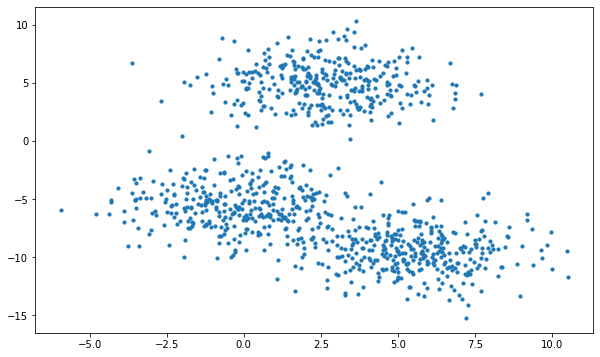

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=10)
plt.show()

In [14]:
data[:5]

array([[ 3.79712009e+00, -1.02770894e+01],
       [ 2.06671331e+00,  2.19939173e+00],
       [-6.37918939e-03, -6.54207068e+00],
       [ 2.65297065e-01, -3.36688427e+00],
       [ 7.08752170e-01,  6.26816353e+00]])

In [32]:
k = 3
centroid_x = np.random.randint(np.min(data[:,0]), np.max(data[:,1]), size=3)
centroid_y = np.random.randint(np.min(data[:,0]), np.max(data[:,1]), size=3)

In [33]:
centroids = np.array([centroid_x, centroid_y]).T

In [34]:
centroids

array([[-2, -5],
       [ 3,  5],
       [ 1,  4]])

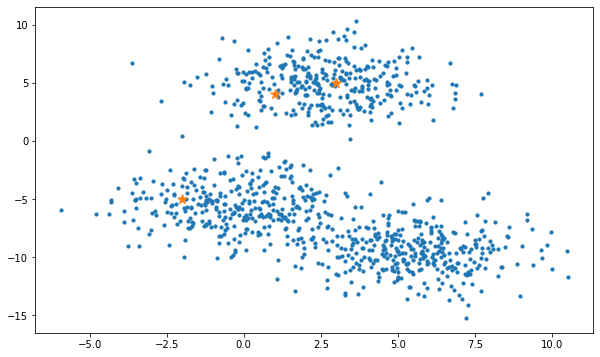

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=10)
plt.scatter(centroid_x, centroid_y, marker="*", s=100)
plt.show()

In [36]:
def euclidean_dist(a,b, axis=1):
    return np.linalg.norm(a - b, axis=axis)

In [37]:
centroids_old = np.zeros_like(centroids)

In [38]:
clusters = np.zeros(len(data))

In [39]:
def plot(clusters, centroids):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:,0], points[:,1], s=10, c=colors[i])
    ax.scatter(centroids[:,0], centroids[:,1], marker="*", s=100, c='purple')
    plt.show()

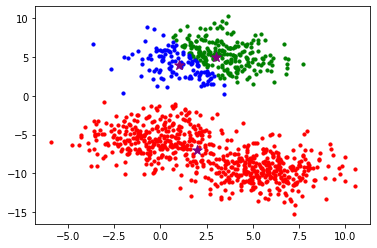

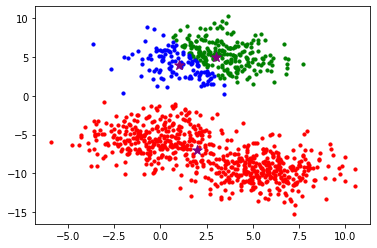

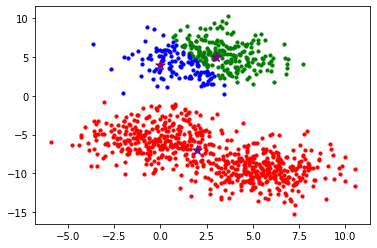

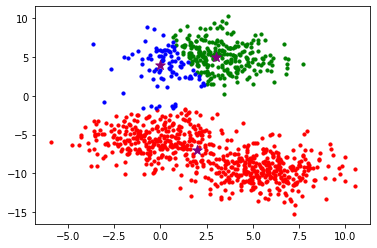

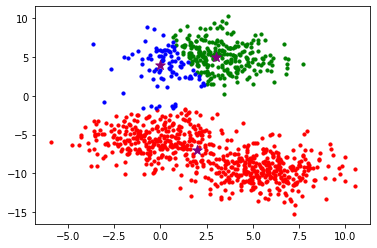

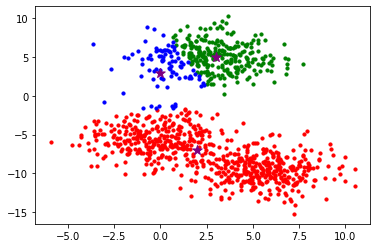

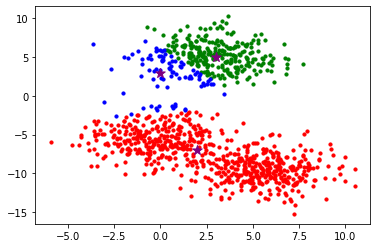

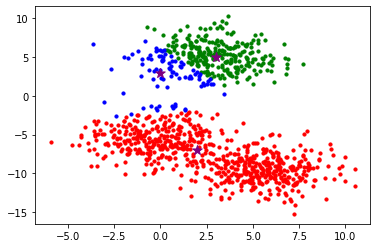

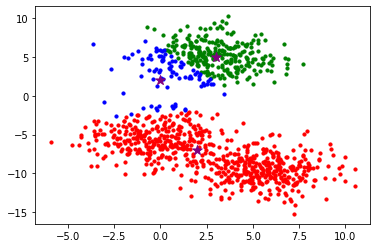

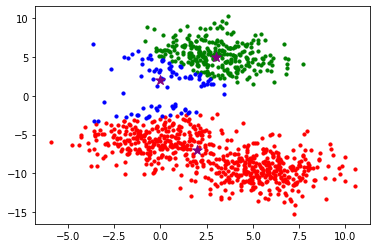

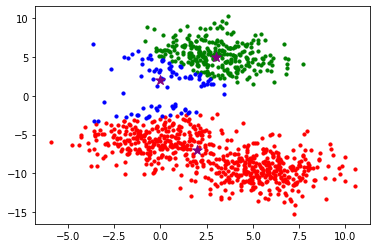

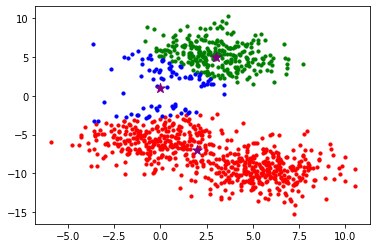

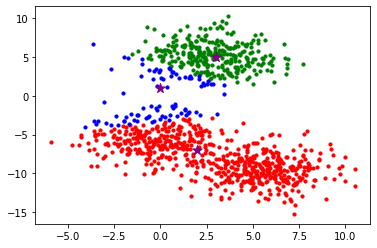

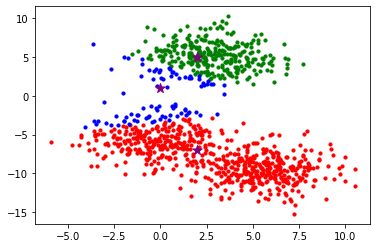

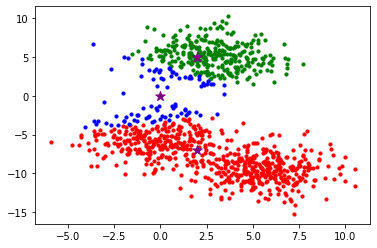

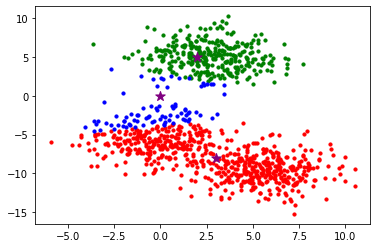

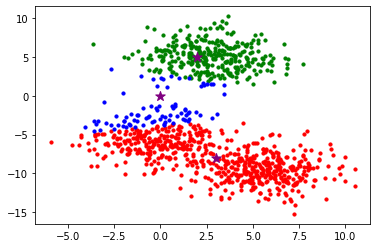

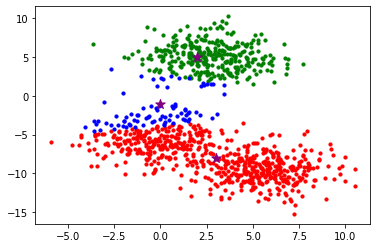

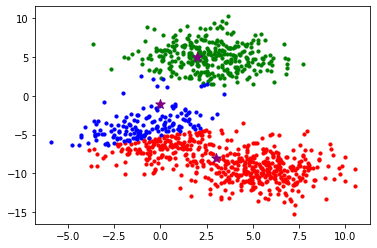

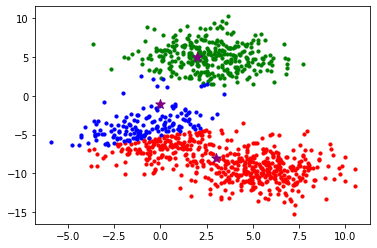

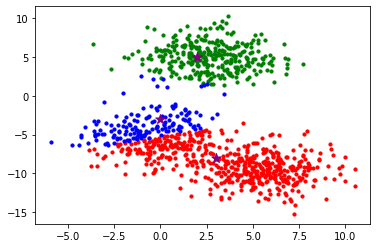

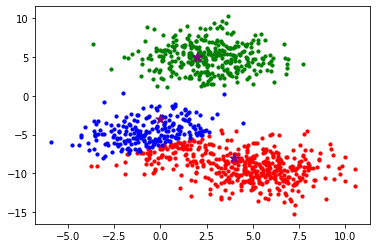

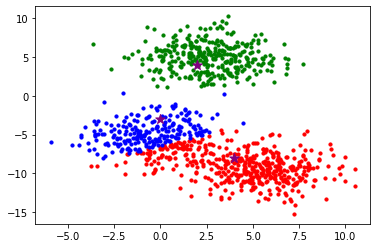

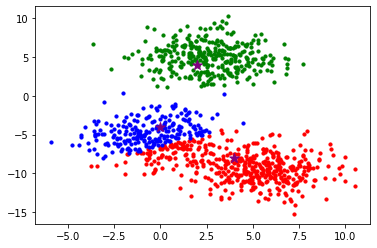

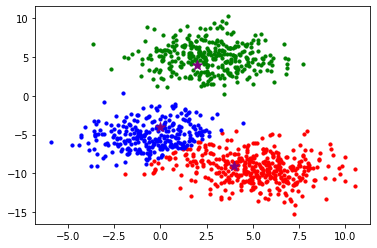

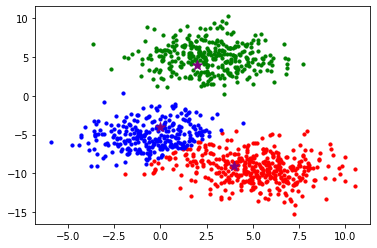

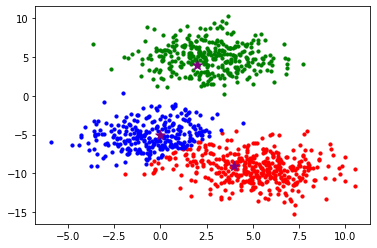

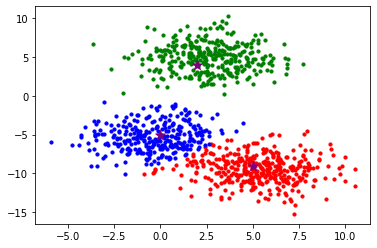

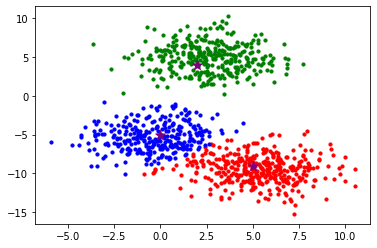

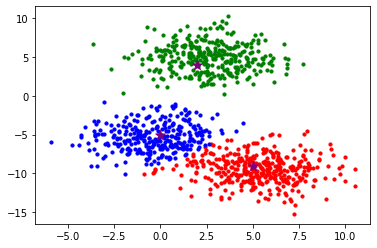

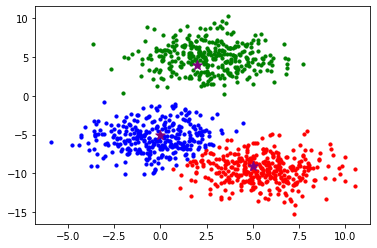

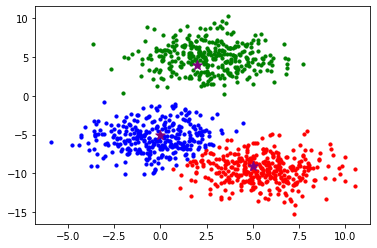

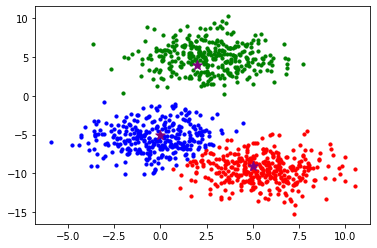

In [40]:
error = euclidean_dist(centroids, centroids_old, None)
while error != 0:
    for i in range(len(data)):
        distance = euclidean_dist(data[i], centroids)
        cluster = np.argmin(distance)
        clusters[i] = cluster
        
    centroids_old = deepcopy(centroids)
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
        plot(clusters, centroids)
    error = euclidean_dist(centroids, centroids_old, None)

In [42]:
clusters[:10]

array([0., 1., 2., 2., 1., 2., 2., 2., 2., 2.])